In [1]:
import sys
import pandas as pd
from os import listdir
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42

In [16]:
def pre(d, fc):
    d=d[(d.AvgSpec>=2)&(d.BFDR<0.01)&(d.FoldChange>=fc)]
    d = d[["PreyGene", "AvgSpec", "FoldChange", "BFDR"]]
    d.columns = ["gene", "count", "ratio","fdr"]
    d=d.sort_values(by="ratio", ascending=False)
    return d

fc = 50
saint = pd.read_table("/rna/han/gigyf2_nsp2/submission/pride/processed/gigyf2_fclip_ms_saint.txt")
g = pre(saint, fc)
genelist = [g for g in g.gene.tolist() if g != "GIGYF2"]

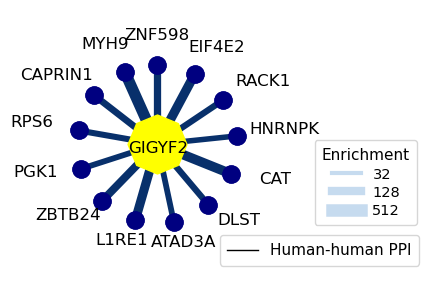

In [18]:
import math
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

geneorder = "ZNF598 EIF4E2 RACK1 HNRNPK CAT DLST ATAD3A L1RE1 ZBTB24 PGK1 RPS6 CAPRIN1 MYH9".split(" ")
d = g[g.gene!="GIGYF2"].reset_index(drop=True)
d["geneorder"] = d.gene.apply(lambda x: geneorder.index(x))
d = d.sort_values("geneorder").reset_index()
degree = range(0,360,28)
xs = [math.sin(math.pi * (val / 180)) for val in degree]
ys = [math.cos(math.pi * (val / 180)) for val in degree]
dxs = {d.gene[i]:xs[i] for i in range(len(d))}
dys = {d.gene[i]:ys[i] for i in range(len(d))}
cmap = plt.get_cmap('Blues')

fig, ax = plt.subplots(1,1,figsize = [3.5,3.5])
ax.scatter([0],[0],marker=(8, 0, 0), s = 1800, c = 'yellow', zorder = 4)
ax.annotate("GIGYF2",(.01,-.1), fontsize = 12, ha = 'center',zorder = 5)
ax.scatter(xs,ys, s = 150, c ='navy', alpha = 1, zorder = 3)
for i in range(len(genelist)):
    ax.scatter([xs[i]], [ys[i]], s = 150, c ='navy', alpha = 1, zorder = 3)
    ax.plot([0,xs[i]],[0,ys[i]],lw = np.log2(d['ratio'][i]/8)*1.5, c = cmap(1-d['fdr'][i]/0.05), alpha = 1, zorder = 2)


for i in range(len(d)):
    ax.annotate(d.gene[i],(xs[i]*1.6,ys[i]*1.32),fontsize = 12, ha = 'center')

widths = [32, 128, 512]
lines = [mlines.Line2D([], [], color=cmap(0.25), lw = np.log2(width/8)*1.5) for width in widths]
legend2 = ax.legend(title = 'Enrichment', handles = lines, labels = widths,
                    borderpad = .5, labelspacing = .3, loc = (1.08,.2), title_fontsize = 11, fontsize = 10.5)
ax.add_artist(legend2)

linepatch = mlines.Line2D([0],[0], color = 'k', lw = 1)
legend4 = ax.legend(handles = [linepatch],labels = ['Human-human PPI'],
                    fontsize = 11, labelspacing = .5, borderpad = .5, loc = (.73,.05))

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-1.7,1.7)
ax.set_ylim(-1.7,1.7)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)